# 0.6 Train SVM model

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import os
import string
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [3]:
cd /Users/anacriel/plant_seed_classification/src

/Users/anacriel/plant_seed_classification/src


In [4]:
dataset = pd.read_csv("data/advanced_features_resized_denoised.csv")

In [5]:
X = dataset.iloc[:, 2:]
X.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,entropy
0,4245.0,353.764499,75,88,0.852273,1.554770,29.481583,9.725844,11.541733,6.088189,20.808731,24.505210,13.222195,443.390356,0.962804,2.258445
1,8891.5,421.546242,125,121,1.033058,1.701063,19.985518,13.390867,15.767678,7.641989,24.935571,29.251927,14.481795,346.967323,0.973616,2.553794
2,4886.0,333.362478,84,91,0.923077,1.564470,22.744687,10.130722,11.900622,6.273078,22.773547,26.494813,14.221009,285.960447,0.972714,2.075371
3,9039.5,386.090401,98,133,0.736842,1.441894,16.490492,12.389667,14.562111,6.971100,24.131291,28.169791,13.716031,232.337831,0.981612,2.280736
4,283.5,73.012192,20,27,0.740741,1.904762,18.803458,15.295611,17.843856,9.533411,25.185857,29.143992,16.023515,402.579138,0.974327,3.102906


In [6]:
y = dataset.iloc[:,1]
y.head(5)

0    9
1    9
2    9
3    9
4    9
Name: label, dtype: int64

## Cross validational split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 140)

In [9]:
X_train.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,entropy
2843,4235.0,278.994947,95,65,1.461538,1.458087,18.379736,17.585144,17.955289,6.410078,32.398148,32.966717,12.144020,243.303850,0.979573,2.398916
4520,33573.0,1190.940248,293,236,1.241525,2.059631,42.246409,24.573944,30.220878,10.583189,32.943526,40.123265,16.009523,323.294665,0.979507,4.048271
4350,54.0,46.284271,11,17,0.647059,3.462963,39.670994,27.248900,32.387856,14.963178,32.174338,37.850752,18.067772,335.333586,0.980582,4.162568
2165,2616.0,216.911687,73,48,1.520833,1.339450,17.985734,20.019556,22.960589,8.052700,31.633771,36.257730,14.511716,305.137246,0.978522,3.285089
2521,23220.5,1308.011317,250,231,1.082251,2.487027,73.680309,21.277278,23.381178,8.732578,36.276738,39.930474,16.024894,325.315799,0.972102,2.932729


In [10]:
y_train[0:5]

2843    1
4520    3
4350    3
2165    2
2521    6
Name: label, dtype: int64

In [11]:
from sklearn import preprocessing

In [12]:
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

In [13]:
X_train

array([[9.95745498e-01, 6.55981022e-02, 2.23366759e-02, ...,
        5.72063077e-02, 2.30319998e-04, 5.64040170e-04],
       [9.99259663e-01, 3.54468934e-02, 8.72078996e-03, ...,
        9.62247395e-03, 2.91538501e-05, 1.20491891e-04],
       [1.53145420e-01, 1.31263408e-01, 3.11962892e-02, ...,
        9.51014868e-01, 2.78095545e-03, 1.18051528e-02],
       ...,
       [9.91632126e-01, 7.25847354e-02, 1.52230907e-02, ...,
        1.01868212e-01, 1.96404343e-04, 6.46993863e-04],
       [0.00000000e+00, 7.04638580e-03, 3.52319290e-03, ...,
        9.80591701e-01, 3.44426548e-03, 9.21069554e-03],
       [3.63393601e-02, 1.02209329e-01, 4.44147735e-02, ...,
        9.37287559e-01, 3.94958625e-03, 7.95122692e-03]])

In [14]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train[0:2]

array([[ 0.62530229, -0.31172069, -0.15707881, -0.38663163, -0.34058079,
        -0.36151907, -0.41687017, -0.32041213, -0.34197615, -0.37824301,
        -0.47136847, -0.48759712, -0.53536143, -0.61217776, -0.46228461,
        -0.40733995],
       [ 0.63442705, -0.67798386, -0.63269467, -0.68663061, -0.41327041,
        -0.38781476, -0.44919817, -0.49427254, -0.49232607, -0.53364355,
        -0.6514012 , -0.64804025, -0.67394962, -0.73234828, -0.55722903,
        -0.55399347]])

In [16]:
y_train[0:2]

2843    1
4520    3
Name: label, dtype: int64

In [17]:
X_train.std()

1.0

In [18]:
X_test.mean()

0.012937630466493134

## Applying SVM classifier model

In [19]:
from sklearn import svm

In [37]:
clf = svm.SVC(kernel='rbf', C=1000, decision_function_shape='ovo', gamma=0.1)
clf.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
y_pred = clf.predict(X_test)

In [39]:
from sklearn import metrics

In [40]:
metrics.accuracy_score(y_test, y_pred)

0.7052631578947368

In [41]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73        86
           1       0.76      0.75      0.76       118
           2       0.65      0.64      0.64       106
           3       0.65      0.79      0.71        81
           4       0.80      0.84      0.82       106
           5       0.67      0.43      0.52        42
           6       0.49      0.53      0.51        43
           7       0.58      0.65      0.61        40
           8       0.84      0.88      0.86       108
           9       0.79      0.60      0.68        55
          10       0.74      0.75      0.74       119
          11       0.36      0.28      0.32        46

   micro avg       0.71      0.71      0.71       950
   macro avg       0.67      0.66      0.66       950
weighted avg       0.70      0.71      0.70       950



In [42]:
def gridSearch(DataSet, LabelSet):
    #define logspace/interval from which c and gamma valuest are computed and saved to a dictionary to be passed as a parameter
    #c from 1e-2 to 1e10
    C_range = np.logspace(-2, 10, 13)
    #gamma from 1e-9 to 1e3
    gamma_range = np.logspace(-9, 3, 13)
    param_grid = dict(gamma=gamma_range, C=C_range)
    
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv, n_jobs=1)
    grid.fit(DataSet, LabelSet)
    
    return grid.best_score_

In [43]:
import pickle

In [28]:
# save the classifier
with open('/Users/anacriel/plant_seed_classification/models/svm_clf_classifier_resized_1.pkl', 'wb') as fid:
    pickle.dump(clf, fid) 

## Checking test images

In [44]:
def get_features(images, titles):
    features_names = ['title', 'area', 'perimeter', 'physiological_length', \
                      'physiological_width', 'aspect_ratio', 'rectangularity', 'circularity', \
                      'mean_r', 'mean_g', 'mean_b', 'stddev_r', 'stddev_g','stddev_b', \
                      'contrast','correlation', 'entropy']
    df = pd.DataFrame([], columns=features_names)
    for i in range(len(images)):
        #Delete background
        mask = vs.create_mask_for_plant(images[i])
        seg_image = cv2.bitwise_and(images[i], images[i], mask=mask)
        seg_image = vs.sharpen_image(seg_image)
        seg_image[mask == 0] = 255
            
        #Preprocessing
        img = cv2.cvtColor(seg_image, cv2.COLOR_BGR2RGB)
        gs = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        ret_otsu, im_bw_otsu = cv2.threshold(gs, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        kernel = np.ones((5, 5), np.uint8)
        closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
        #Shape features
        contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        #if not contours:
        #    continue
        cnt = contours[0]
        M = cv2.moments(cnt)
        area = cv2.contourArea(cnt)
        perimeter = cv2.arcLength(cnt, True)
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = 0.0 if h == 0.0 else float(w) / h
        rectangularity = 0.0 if area == 0.0 else  w * h / area
        circularity = 0.0 if area == 0.0 else ((perimeter) ** 2) / area
        
        #Color features
        red_channel = img[:,:,0]
        green_channel = img[:,:,1]
        blue_channel = img[:,:,2]
        blue_channel[blue_channel == 255] = 0
        green_channel[green_channel == 255] = 0
        red_channel[red_channel == 255] = 0
        
        red_mean = np.mean(red_channel)
        green_mean = np.mean(green_channel)
        blue_mean = np.mean(blue_channel)
        
        red_std = np.std(red_channel)
        green_std = np.std(green_channel)
        blue_std = np.std(blue_channel)
        
        #Texture features
        textures = mt.features.haralick(gs)
        ht_mean = textures.mean(axis=0)
        contrast = ht_mean[1]
        correlation = ht_mean[2]
        entropy = ht_mean[8]
        
        vector = [titles[i], area,perimeter,w,h,aspect_ratio,rectangularity,circularity,\
                  red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
                  contrast,correlation,entropy]
        
        df_temp = pd.DataFrame([vector],columns=features_names)
        df = df.append(df_temp)
    return df

In [45]:
cd /Users/anacriel/plant_seed_classification/

/Users/anacriel/plant_seed_classification


In [46]:
import src.visualization.visualize as vs
import src.features.build_features as bfeatures
import cv2
import mahotas as mt
from matplotlib import pyplot as plt

In [47]:
data_dir = '../data/processed/'
test_image_dir = os.path.join(data_dir, 'test')

In [48]:
cd /Users/anacriel/plant_seed_classification/src

/Users/anacriel/plant_seed_classification/src


In [49]:
images, titles = vs.read_images(test_image_dir, data_type='test')

794


In [50]:
features_of_img = get_features(images, titles)

In [51]:
features_of_img.drop(columns='title', inplace=True)

In [52]:
features_of_img

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,entropy
0,10474.5,901.678273,194,176,1.102273,3.259726,77.619333,18.830475,22.201450,7.898525,31.369592,36.724657,14.204939,509.372473,0.961786,3.458075
0,603.5,352.492421,119,62,1.919355,12.225352,205.883856,3.328175,3.616725,1.880675,15.762264,17.012812,9.103054,461.932031,0.829756,0.770849
0,10116.5,497.830514,183,95,1.926316,1.718480,24.498119,18.226950,21.961450,7.969200,31.222592,37.552700,14.521376,299.963819,0.976138,3.342835
0,5945.5,514.541192,136,187,0.727273,4.277521,44.529920,11.130650,13.210050,5.628075,26.387218,31.155451,14.095701,282.822166,0.966349,2.088232
0,16972.0,743.695518,187,191,0.979058,2.104466,32.587970,25.011775,30.901000,14.131375,30.291546,37.124057,19.356647,515.979244,0.970758,4.956965
0,720.5,353.605118,138,66,2.090909,12.641221,173.541401,3.480950,3.741650,2.124400,16.071328,17.162953,9.876602,339.487626,0.877149,0.747992
0,15032.5,500.516807,189,110,1.718182,1.383003,16.665031,26.133650,30.400400,10.312250,33.912429,39.123497,14.749536,252.903182,0.984358,4.375090
0,1492.0,320.735061,96,50,1.920000,3.217158,68.948377,14.360250,15.886400,6.529300,30.586925,33.803280,14.999638,717.462790,0.925766,2.713894
0,7559.5,645.511751,156,187,0.834225,3.858985,55.120765,14.725600,16.812050,4.185125,30.239339,34.326109,10.436915,352.779243,0.965615,2.585454
0,50.0,46.284271,12,19,0.631579,4.560000,42.844674,1.088325,1.123125,0.605400,9.623384,9.890132,5.371517,163.677042,0.783275,0.243768


In [53]:
features_of_img = preprocessing.normalize(features_of_img)

In [54]:
scaler = preprocessing.StandardScaler()
features_of_img = scaler.fit_transform(features_of_img)

In [55]:
y_test_pred = clf.predict(features_of_img)

In [56]:
y_test_pred[0]

3

In [57]:
cols = {'file':titles, 'species':y_test_pred}

In [58]:
submission_df = pd.DataFrame(data=cols)

In [59]:
submission_df.iloc[520]

file       e721c6ac8.png
species               10
Name: 520, dtype: object

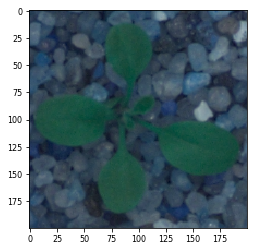

In [65]:
plt.imshow(images[0])

In [62]:
submission_df

,file,species
0,1b490196c.png,3
1,85431c075.png,10
2,506347cfe.png,3
3,7f46a71db.png,5
4,668c1007c.png,3
5,71f5323c5.png,10
6,1f3f44563.png,3
7,beebe5f4e.png,2
8,780defa2e.png,8
9,df521c0c0.png,10


In [66]:
submission_df.to_csv("data/4th_submission.csv")

In [67]:
mapping = { 'Sugar beet': 0, 'Fat Hen': 1, 'Scentless Mayweed' : 2, 'Charlock' : 3,
           'Small-flowered Cranesbill': 4, 'Maize': 5, 'Shepherds Purse' :6, 'Common wheat': 7,
           'Common Chickweed': 8, 'Cleavers': 9, 'Loose Silky-bent' : 10, 'Black-grass': 11 }

In [68]:
mapping_rev = {v : k for k, v in mapping.items()}

In [69]:
mapping_rev

{0: 'Sugar beet',
 1: 'Fat Hen',
 2: 'Scentless Mayweed',
 3: 'Charlock',
 4: 'Small-flowered Cranesbill',
 5: 'Maize',
 6: 'Shepherds Purse',
 7: 'Common wheat',
 8: 'Common Chickweed',
 9: 'Cleavers',
 10: 'Loose Silky-bent',
 11: 'Black-grass'}

In [70]:
submission_df.species.replace(mapping_rev, inplace=True); submission_df

,file,species
0,1b490196c.png,Charlock
1,85431c075.png,Loose Silky-bent
2,506347cfe.png,Charlock
3,7f46a71db.png,Maize
4,668c1007c.png,Charlock
5,71f5323c5.png,Loose Silky-bent
6,1f3f44563.png,Charlock
7,beebe5f4e.png,Scentless Mayweed
8,780defa2e.png,Common Chickweed
9,df521c0c0.png,Loose Silky-bent


In [71]:
submission_df.to_csv("/Users/anacriel/submission.csv", index=False)